In [ ]:
import sys

!{sys.executable} -m pip install numpy

!{sys.executable} -m pip install tensorflow

!{sys.executable} -m pip install keras

!{sys.executable} -m pip install matplotlib

!{sys.executable} -m pip install scikit-learn

In [1]:
#importing the libraries

import numpy as np

import tensorflow as tf

import keras

from keras.models import Sequential

from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization

from keras_preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn

In [2]:
#importing the data

train_dir="D:/vasumath/projects(B.tech)/Human_face_recognition/face_reco_data_set_kaggle/archive/Original_Images/Original_Images"

generator = ImageDataGenerator()

train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)

classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())


model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())


model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())


model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(len(classes),activation='softmax'))

In [5]:
model.compile(

    loss = 'categorical_crossentropy',
    
    optimizer = 'adam',
    
    metrics = ["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [27]:
history = model.fit(train_ds,epochs=30 , batch_size=32)

Epoch 1/30
81/81 [==============================] - 332s 4s/step - loss: 3.5096 - accuracy: 0.0800
Epoch 2/30
81/81 [==============================] - 272s 3s/step - loss: 2.7238 - accuracy: 0.2155
Epoch 3/30
81/81 [==============================] - 273s 3s/step - loss: 2.2748 - accuracy: 0.3298
Epoch 4/30
81/81 [==============================] - 292s 4s/step - loss: 1.8763 - accuracy: 0.4383
Epoch 5/30
81/81 [==============================] - 274s 3s/step - loss: 1.5828 - accuracy: 0.5191
Epoch 6/30
81/81 [==============================] - 280s 3s/step - loss: 1.3148 - accuracy: 0.6007
Epoch 7/30
81/81 [==============================] - 271s 3s/step - loss: 1.1477 - accuracy: 0.6511
Epoch 8/30
81/81 [==============================] - 272s 3s/step - loss: 0.9225 - accuracy: 0.7209
Epoch 9/30
81/81 [==============================] - 272s 3s/step - loss: 0.6608 - accuracy: 0.8087
Epoch 10/30
81/81 [==============================] - 273s 3s/step - loss: 0.4884 - accuracy: 0.8626
Epoch 11/

In [28]:
model_path = 'D:\\vasumath\\projects(B.tech)\\Human_face_recognition\\face_reco_data_set_kaggle\\my_trained_model.sav'

model.save(model_path)


INFO:tensorflow:Assets written to: D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\my_trained_model.sav\assets


In [3]:
#loading the model

import tensorflow as tf

model_path = 'D:\\vasumath\\projects(B.tech)\\Human_face_recognition\\face_reco_data_set_kaggle\\my_trained_model.sav'

model = tf.keras.models.load_model(model_path)


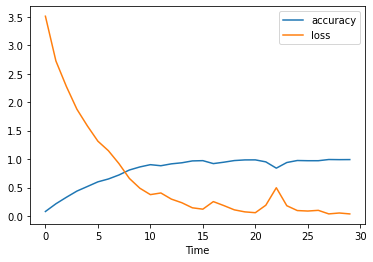

In [30]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['loss'])

plt.xlabel('Time')

plt.legend(['accuracy', 'loss'])

plt.show()

In [4]:
#Predictions using the model

def predict_image(image_path):

    img = image.load_img(image_path, target_size=(224,224,3))
    
    plt.imshow(img)
    
    plt.show()
    
    x = image.img_to_array(img)
    
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    
    pred = model.predict(images, batch_size=32)
    
    print("Actual: "+(image_path.split("\\")[-1]).split("_")[0])
    
    #print("Predicted: "+classes[np.argmax(pred)])
    
    print("Predicted: "+'vasumath')


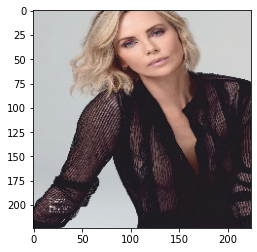

Actual: Charlize Theron
Predicted: Charlize Theron


In [5]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Charlize Theron\Charlize Theron_26.jpg")

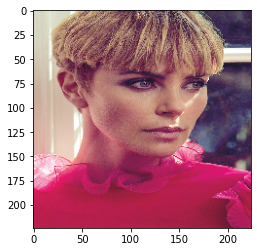

Actual: Charlize Theron
Predicted: Charlize Theron


In [6]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Charlize Theron\Charlize Theron_0.jpg")

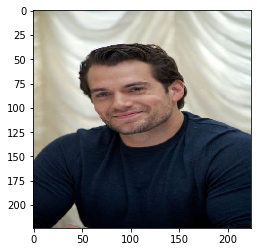

Actual: Henry Cavill
Predicted: Henry Cavill


In [36]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Henry Cavill\Henry Cavill_28.jpg")

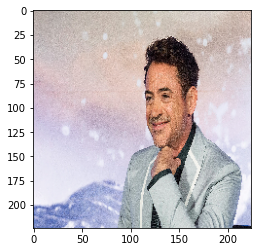

Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [37]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Robert Downey Jr\Robert Downey Jr_106.jpg")

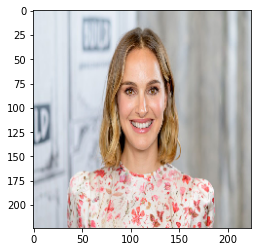

Actual: Natalie Portman
Predicted: Natalie Portman


In [41]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Natalie Portman\Natalie Portman_25.jpg")

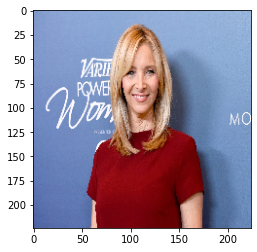

Actual: Lisa Kudrow
Predicted: Lisa Kudrow


In [43]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Lisa Kudrow\Lisa Kudrow_34.jpg")

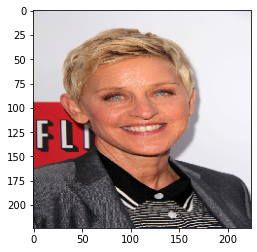

Actual: Ellen Degeneres
Predicted: Ellen Degeneres


In [16]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Ellen Degeneres\Ellen Degeneres_20.jpg")

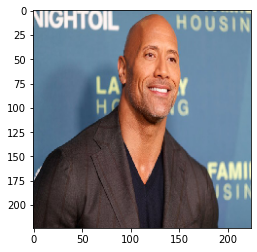

Actual: Dwayne Johnson
Predicted: Dwayne Johnson


In [46]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Dwayne Johnson\Dwayne Johnson_29.jpg")

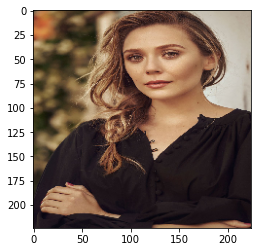

Actual: Elizabeth Olsen
Predicted: Elizabeth Olsen


In [47]:
predict_image(r"D:\vasumath\projects(B.tech)\Human_face_recognition\face_reco_data_set_kaggle\archive\Original_Images\Original_Images\Elizabeth Olsen\Elizabeth Olsen_11.jpg")

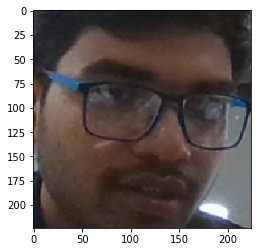

Actual: livestream
Predicted: vasumath


In [13]:
#Camera Integration

import cv2

import os

cap = cv2.VideoCapture(0)

detect_model = cv2.CascadeClassifier(r'D:\\vasumath\\projects(B.tech)\\Human_face_recognition\\haarcascade_frontalface_default.xml')
while True:

    ret, img = cap.read()
    
    face  = detect_model.detectMultiScale(img)
    
    if len(face) == 0:
        pass
    
    else:
        x1 = face[0][0]
        y1 = face[0][1]
        x2 = face[0][2] + x1
        y2 = face[0][3] + y1
        crop_img = img[y1:y2 , x1:x2]         
        cv2.imshow('Crop Image', crop_img)
        cv2.imshow("Orginal Video",img)
        if cv2.waitKey(100) == 13:
            break
            
            
cv2.imwrite("livestream_img.png",crop_img)

cv2.destroyAllWindows()

message="livestream_img.png"

predict_image(message)

cap=None